In [68]:
import pandas as pd
import seaborn as sns

from matplotlib.ticker import MaxNLocator
from sympy import Piecewise, symbols
from sympy.plotting import plot
from typing import TypedDict

In [11]:
class Data(TypedDict):
  round: int
  amount: int

In [135]:
allocation, at, start, duration = symbols("allocation round start duration", integer=True, positive=True)

expr = Piecewise(
  (0, at < start),
  (allocation, at >= start + duration),
  ((allocation * (at - start)) // duration, True) # True = otherwise
)
expr

Piecewise((0, round < start), (allocation, round >= duration + start), (floor(allocation*(round - start)/duration), True))

In [144]:
schedule = expr.subs([
  (allocation, 100_000),
  (start, 50),
  (duration, 0)
])

schedule

Piecewise((0, round < 50), (100000, True))

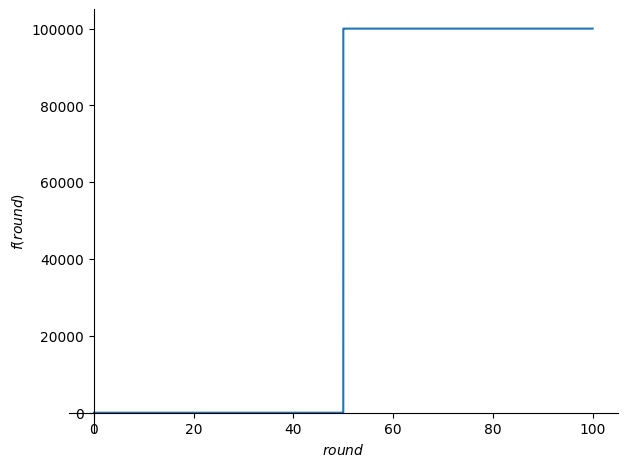

In [137]:
plot(
  schedule,
  (at, 0, 100)
)